In [3]:
import pandas as pd
from scipy.stats import truncnorm
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import expit as activation_function

In [4]:
df = pd.read_csv("fashion-mnist_train.csv")
df2 = pd.read_csv("fashion-mnist_test.csv")

In [5]:
data = np.array(df)
np.random.shuffle(data)
n_samples,n_features = data.shape


data_train = data[0:n_samples].T
Y_train = data_train[0]
X_train = data_train[1:n_features]/255
#data_train.shape


In [6]:
data_test = data[0:n_samples].T
Y_test = data_test[0]
X_test = data_test[1:n_features]/255
#X_test
#data_test.shape

In [7]:
#all of these helper functions were taken from the labs 6 and 7

#relu function
@np.vectorize
def ReLU(x):
    return np.maximum(0,x)

#dderivative of Relu
@np.vectorize
def d_ReLU(x):
    return x > 0

#softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

#sigmoid function
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#derivative of sigmoid
@np.vectorize
def d_sigmoid(x):
    return x * (1.0 - x)

def one_hot_encode_Y(Y):
    newY = np.zeros ( (Y.size, Y.max() + 1))
    newY[np.arange(Y.size), Y] = 1
    newY = newY.T
    return newY

def difference(arr):
    return [item-arr[i-1] for i, item in enumerate(arr) if i != 0]



In [18]:
class neuralNetwork():
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        self.newY = one_hot_encode_Y(self.no_of_out_nodes)
        
    def create_weight_matrices(self):
        self.w1 = np.random.rand(10, 784) - 0.5 
        self.b1 = np.random.rand(10, 1) - 0.5
        self.w2 = np.random.rand(10, 10) - 0.5 
        self.b2 = np.random.rand(10, 1) - 0.5
        return self.w1, self.b1, self.w2, self.b2
    
    def get_predictions(self):
        return np.argmax(self.a2, 0)

    def get_accuracy(self,predictions):
        return (np.sum(predictions == self.no_of_out_nodes) / self.no_of_out_nodes.size) * 100
    
    def train(self, epochs):
        self.create_weight_matrices()
        acc_list = []
        for i in range(epochs):
            #forward pass
            self.z1 = self.w1.dot(self.no_of_in_nodes) + self.b1
            self.a1 = ReLU(self.z1)
            self.z2 = self.w2.dot(self.a1) + self.b2
            self.a2 = softmax(self.z2)
            
            #backwards pass
            m = self.no_of_out_nodes.size
            self.dz2 = self.a2 - self.newY
            self.dw2 = 1/m * self.dz2.dot(self.a1.T)
            self.db2 = 1/m * np.sum(self.dz2)
            self.dz1 = self.w2.T.dot(self.dz2) * d_ReLU(self.z1)
            self.dw1 = 1/m * self.dz1.dot(self.no_of_in_nodes.T)
            self.db1 = 1/m * np.sum(self.dz1)
            
            print(f'epoch: {i+1}') 
            print(f'Accuracy: {(self.get_accuracy(self.get_predictions ())):.2f}%')
            acc_list.append(self.get_accuracy(self.get_predictions ()))
        return acc_list
            
    
    def SGDTrain(self, epochs):
        self.create_weight_matrices()
        acc_list = []
        for i in range(epochs):
            
            #forward pass
            self.z1 = self.w1.dot(self.no_of_in_nodes) + self.b1
            self.a1 = ReLU(self.z1)
            self.z2 = self.w2.dot(self.a1) + self.b2
            self.a2 = softmax(self.z2)
            
            #backwards pass
            m = self.no_of_out_nodes.size
            self.dz2 = self.a2 - self.newY
            self.dw2 = 1/m * self.dz2.dot(self.a1.T)
            self.db2 = 1/m * np.sum(self.dz2)
            self.dz1 = self.w2.T.dot(self.dz2) * d_ReLU(self.z1)
            self.dw1 = 1/m * self.dz1.dot(self.no_of_in_nodes.T)
            self.db1 = 1/m * np.sum(self.dz1)
            
            #update weights
            self.w1 -= self.learning_rate * self.dw1
            self.b1 -= self.learning_rate * self.db1
            self.w2 -= self.learning_rate * self.dw2
            self.b2 -= self.learning_rate * self.db2
            
            print(f'epoch: {i+1}') 
            print(f'Accuracy: {(self.get_accuracy(self.get_predictions ())):.2f}%')
            acc_list.append(self.get_accuracy(self.get_predictions ()))
            
            #stopping criteria so if accuracy increase 2 times in a row is less than 0.2 it stops training
            diff = difference(acc_list[-3:])
            if len(diff) > 1:
                if(diff[-1] < 0.2 and diff[-2] < 0.2):
                    break
                #debugging my stopping criteria
                print(diff[-1])
        return acc_list


In [19]:
model = neuralNetwork(X_train,Y_train, 10 ,0.1)
acc = model.SGDTrain(100)

epoch: 1
Accuracy: 8.73%
[]
epoch: 2
Accuracy: 10.61%
[1.8833333333333329]
epoch: 3
Accuracy: 12.88%
[1.8833333333333329, 2.2699999999999996]
2.2699999999999996
epoch: 4
Accuracy: 13.70%
[2.2699999999999996, 0.8183333333333351]
0.8183333333333351
epoch: 5
Accuracy: 14.24%
[0.8183333333333351, 0.5366666666666653]
0.5366666666666653
epoch: 6
Accuracy: 14.56%
[0.5366666666666653, 0.32333333333333414]
0.32333333333333414
epoch: 7
Accuracy: 16.18%
[0.32333333333333414, 1.6166666666666671]
1.6166666666666671
epoch: 8
Accuracy: 16.92%
[1.6166666666666671, 0.7399999999999984]
0.7399999999999984
epoch: 9
Accuracy: 17.48%
[0.7399999999999984, 0.5633333333333361]
0.5633333333333361
epoch: 10
Accuracy: 18.07%
[0.5633333333333361, 0.5933333333333302]
0.5933333333333302
epoch: 11
Accuracy: 19.68%
[0.5933333333333302, 1.6033333333333353]
1.6033333333333353
epoch: 12
Accuracy: 20.82%
[1.6033333333333353, 1.139999999999997]
1.139999999999997
epoch: 13
Accuracy: 21.85%
[1.139999999999997, 1.030000000000

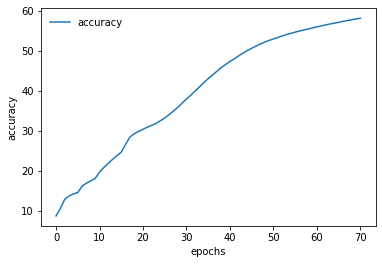

In [20]:
plt.plot(acc, label = 'accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(frameon = False)